In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import scipy.io
import math


In [2]:
# from google.colab import drive

# drive.mount('/content/drive')

# %pwd
# %cd "/content/drive/MyDrive/Colab Notebooks/IAI84/Red Neuronal"
# %pwd

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/IAI84/Red Neuronal


'/content/drive/MyDrive/Colab Notebooks/IAI84/Red Neuronal'

In [2]:
# Importar funciones de archivos .py
from RandParametros import randParametros
from fming import fmincg # función de optimización
from organizarBeta import organizarBeta


In [7]:
mat = scipy.io.loadmat('datos4.mat')
x_data = mat['X']; #5000 X 400
y_data = mat['y']; #5000 X 1
#print(x_data[0,:])

[10]


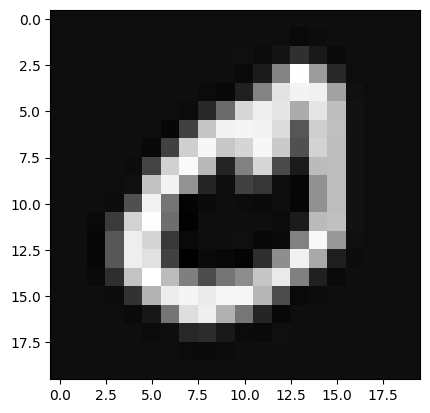

In [12]:
#Es una celda opcional, para tener un ejemplo para visualizar imagenes
cont = 0
DatSetImage = np.zeros((20,20)) # Es la matriz que contiene cada pixel de la imagen a pintar
ImageNumber = 1 #Número de imagen que quiero visualizar

for i in range(20):
  for j in range(20):
    DatSetImage[j,i] = x_data[ImageNumber,cont]
    cont+=1

plt.imshow(DatSetImage, cmap='gray')
print(y_data[ImageNumber])

In [7]:
#Dividir datos en Entrenamiento en 70% y 30%, se entrena con el 70% y se calculan las metricas con el 30%
x_data_30 = np.zeros((0, x_data.shape[1]))
y_data_30 = np.zeros((0, y_data.shape[1]))

x_data_70 = np.zeros((0, x_data.shape[1]))
y_data_70 = np.zeros((0, y_data.shape[1]))

for i in range(0, x_data.shape[0], 500):
    x_data_30 = np.vstack((x_data_30, x_data[i:i+int(0.3*500), :]))
    x_data_70 = np.vstack((x_data_70, x_data[i+int(0.3*500):i+500, :]))

for i in range(0, y_data.shape[0], 500):
    y_data_30 = np.vstack((y_data_30, y_data[i:i+int(0.3*500), :]))
    y_data_70 = np.vstack((y_data_70, y_data[i+int(0.3*500):i+500, :]))

#Calcular la m a partir de x_data_30

In [ ]:
Beta1_grad = 0;
Beta2_grad = 0;

tamano_capa_entrada  = 400;
tamano_capa_media = 25;
num_salidas =  10;

In [ ]:
#Inicializar las matrices Beta con datos random
Beta1_inicial = randParametros(tamano_capa_entrada,tamano_capa_media);
Beta2_inicial = randParametros(tamano_capa_media, num_salidas);

parametros_Beta_Iniciales = np.concatenate((Beta1_inicial, Beta2_inicial),axis=None)
#print(parametros_Beta_Iniciales)
parametros_Beta_Iniciales = np.reshape(parametros_Beta_Iniciales,(parametros_Beta_Iniciales.shape[0],))
#print(parametros_Beta_Iniciales)

In [ ]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Iniciales)

In [ ]:
#Esta celda debe ser finalizada TAREA
def nnFunction1(nn_params,tamano_capa_entrada,tamano_capa_media,num_salidas, x, y, Lambda,m):

    [Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,nn_params)


    for t in range(m):
        #Propagacion hacia adelante TERMINAR
        x1 = x[t,:] #1X400
        a1 = 1 x1 # 1 X 401
        z2 = Beta1*a1
        a2 = sigmoid(z2)




        #Paso intermedio


        #Propagacion hacia atras





        #Acumuladores



        #Funcion cost(J) parte 1
        J1=

    #Funcion cost(J) parte 2

    J=J1+



    #Calculamos gradientes
    Beta1_grad =
    #print(Beta1_grad.shape)
    Beta2_grad =
    #print(Beta2_grad.shape)

    grad = np.concatenate((Beta1_grad,Beta2_grad),axis=None)
    #tam = grad.size
    #grad.resize(tam,1)
    retornar = [J,grad]
    return retornar

In [ ]:
#Celda de prueba

Lambda = 0.1
retornar = nnFunction1(parametros_Beta_Iniciales,tamano_capa_entrada,tamano_capa_media,num_salidas, x_data,y_data, Lambda)
print(retornar[0])

In [ ]:
def costFuncition(p):
    ret = nnFunction1(p,tamano_capa_entrada,tamano_capa_media,num_salidas,x_data_30,y_data_30,Lambda,m)
    return ret


In [ ]:
options = {'maxiter' : 5}
Lambda = 0.1
parametros_Beta_Finales = fmincg(costFuncition,parametros_Beta_Iniciales,options)

In [ ]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Finales)
print(len(parametros_Beta_Finales))
print(Beta2)

In [ ]:
#Cálcular Matriz de Confusión con el 30% de los datos